A Convolutional Neural Network (CNN) is a type of deep learning algorithm that is particularly effective for analyzing visual data. CNNs are widely used in image and video recognition, image classification, medical image analysis, and other related areas.

### Key Components of CNN:
1. **Convolutional Layers**: These layers apply a convolution operation to the input, passing the result to the next layer. They are designed to automatically and adaptively learn spatial hierarchies of features from input images.
2. **Pooling Layers**: These layers perform a down-sampling operation along the spatial dimensions (width, height), resulting in a reduction of the dimensionality of each feature map and retaining the most essential information.
3. **Fully Connected Layers**: These layers are typically used at the end of the network and are used to output the final classification results. They are similar to the layers used in traditional neural networks.
4. **Activation Functions**: Common activation functions used in CNNs include ReLU (Rectified Linear Unit), which introduces non-linearity to the model.

### How CNNs Work:
1. **Input Layer**: The input layer receives the raw pixel values of the image.
2. **Feature Extraction**: Convolutional and pooling layers work together to extract high-level features from the input image.
3. **Classification**: Fully connected layers take the high-level features and output a probability distribution over the possible classes.

### Advantages of CNNs:
- **Parameter Sharing**: Convolutional layers share parameters, which reduces the number of parameters and computational complexity.
- **Translation Invariance**: CNNs can recognize objects in images regardless of their position.
- **Hierarchical Feature Learning**: CNNs automatically learn hierarchical representations of data, from low-level features (edges, textures) to high-level features (objects, faces).

### Applications of CNNs:
- **Image Classification**: Identifying the category of an object in an image.
- **Object Detection**: Detecting and localizing objects within an image.
- **Segmentation**: Partitioning an image into segments or regions.
- **Medical Imaging**: Analyzing medical images for diagnosis and treatment planning.
- **Autonomous Vehicles**: Recognizing and interpreting visual information from the environment.

CNNs have revolutionized the field of computer vision and continue to be a fundamental tool in the development of intelligent systems that can understand and interpret visual data.

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [10]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

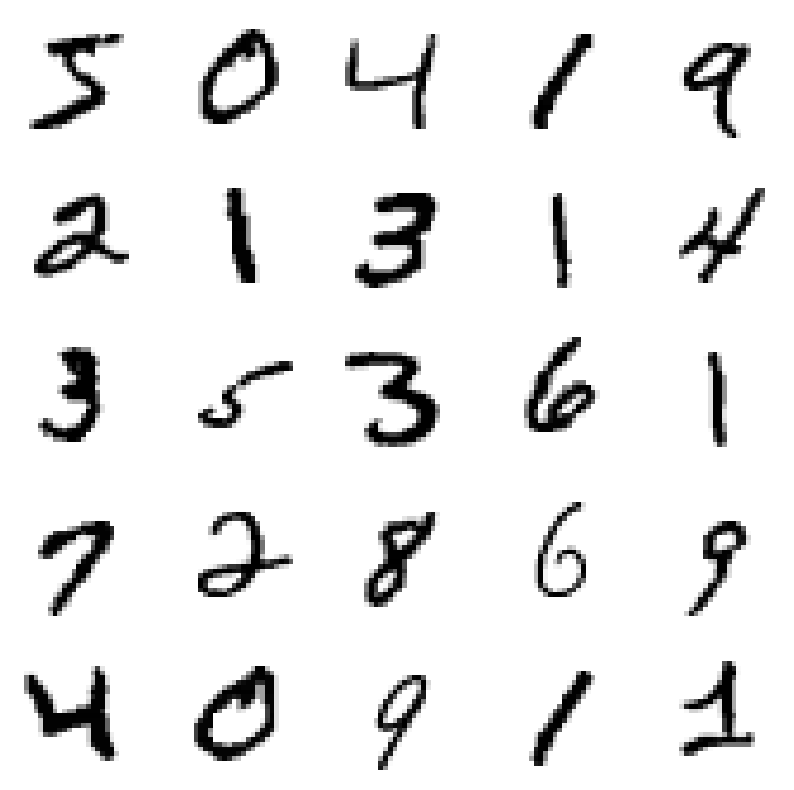

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    plt.axis('off')
plt.show()

In [12]:
print(f'We have {X_train.shape[0]} training samples and {X_test.shape[0]} test samples')
print(f'The images are of size {X_train.shape[1]}x{X_train.shape[2]}')

We have 60000 training samples and 10000 test samples
The images are of size 28x28


In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
y_train.shape

(60000,)

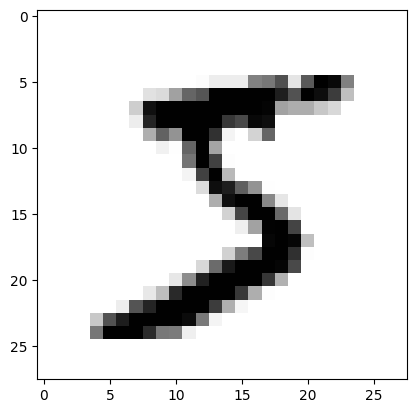

In [15]:
plt.imshow(X_train[0], cmap='binary')

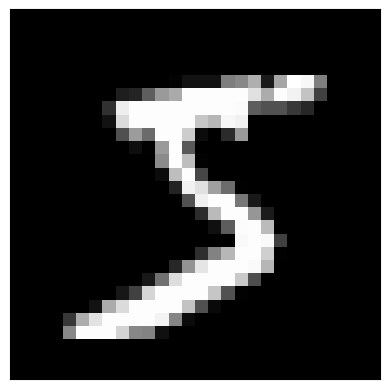

Pixel Values: 
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  

In [17]:
plt.imshow(X_train[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


print('Pixel Values: ')
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end='')
    print()
  

In [18]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [19]:
print('Pixel Values After Normalization: ')
for row in X_train[0]:
    for pixel in row:
        print("{:3.1f}".format(pixel), end='')
    print()

Pixel Values After Normalization: 
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.10.10.10.50.50.70.10.71.01.00.50.00.00.00.0
0.00.00.00.00.00.00.00.00.10.10.40.60.71.01.01.01.01.00.90.71.00.90.80.30.00.00.00.0
0.00.00.00.00.00.00.00.20.91.01.01.01.01.01.01.01.01.00.40.30.30.20.20.00.00.00.00.0
0.00.00.00.00.00.00.00.10.91.01.01.01.01.00.80.71.00.90.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.30.60.41.01.00.80.00.00.20.60.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.10.00.61.00.40.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.0

<Figure size 640x480 with 0 Axes>

<Axes: >

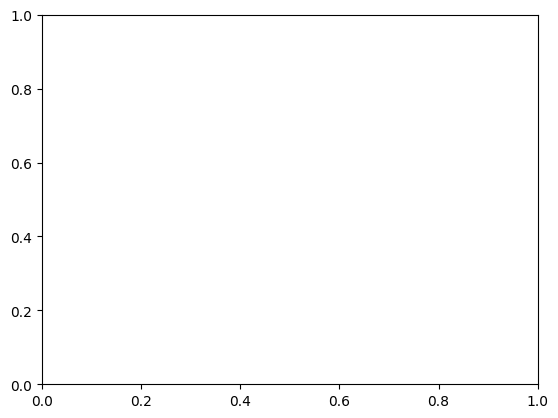

In [20]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

display(plt.gcf())
display(plt.gca())

In [21]:
from tensorflow.keras import layers

In [23]:
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(100, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        16,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,930 (73.95 KB)

 Trainable params: 18,930 (73.95 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=5 , batch_size=32 , validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.7337 - loss: 0.9377 - val_accuracy: 0.9572 - val_loss: 0.1405
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9598 - loss: 0.1270 - val_accuracy: 0.9737 - val_loss: 0.0913
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 22ms/step - accuracy: 0.9748 - loss: 0.0838 - val_accuracy: 0.9793 - val_loss: 0.0751
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9784 - loss: 0.0704 - val_accuracy: 0.9808 - val_loss: 0.0680
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 0.9817 - loss: 0.0580 - val_accuracy: 0.9827 - val_loss: 0.0581


In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9822 - loss: 0.0583
Test accuracy: 0.98580002784729
Test loss: 0.04635611176490784
